In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
PATH_20 = "data/rezultati_2020/Excel/" #+ "02_01.xlsx"
PATH_16 = "data/rezultati_2016/Excel/" #+ "001_00.xlsx"
PATH_15 = "data/rezultati_2015/Excel/" #+ "02_01.xlsx"
PATH_11 = "data/rezultati_2011/Excel/" #+ "01_I_izborna_jedinica.xlsx"

In [4]:
def get_data_ii(i):
    if i < 10:
        i = "0" + str(i)
    data_20 = pd.DataFrame(pd.read_excel(PATH_20 + "02_"+str(i)+".xlsx")) 
    data_16 = pd.DataFrame(pd.read_excel(PATH_16 + "/0"+str(i)+"_00.xlsx"))
    data_15 = pd.DataFrame(pd.read_excel(PATH_15 + "02_"+str(i)+".xlsx"))
    #data_11 = pd.DataFrame(pd.read_excel(PATH_11 + ""+str(i)+"_izborna_jedinica.xlsx"))
    return data_20, data_16, data_15

### Preprocessing

In [5]:
def get_all_data():
    dataframes_20 = []
    dataframes_16 = []
    dataframes_15 = []
    #dataframes_11 = []

    for i in tqdm(range (1,11)):
        data_20, data_16, data_15 = get_data_ii(i)
        #remove first row and last 3 rows
        #data_11 = data_11.iloc[1:-3]

        data_20 = data_20.filter(regex="Grad/općina/država|Rbr BM|Naziv BM|Lokacija BM|Adresa BM|Ukupno birača|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
        data_16 = data_16.filter(regex="Grad/općina/država|Rbr BM|Naziv BM|Lokacija BM|Adresa BM|Ukupno birača|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
        data_15 = data_15.filter(regex="Grad/općina/država|Rbr BM|Naziv BM|Lokacija BM|Adresa BM|Ukupno birača|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
        #data_11 = data_11.filter(regex="BM Rbr|BM Naziv|BM Adresa|Glasovalo ukupno|SDP|HDZ", axis=1)

        data_20.columns = ["Grad", "Rbr BM", "Naziv BM", "Lokacija BM", "Adresa BM","Ukupno birača", "Glasovalo ukupno","MOST", "HDZ", "SDP"]
        data_16.columns = ["Grad", "Rbr BM", "Naziv BM", "Lokacija BM", "Adresa BM","Ukupno birača", "Glasovalo ukupno","MOST", "HDZ", "SDP"]
        data_15.columns = ["Grad", "Rbr BM", "Naziv BM", "Lokacija BM", "Adresa BM","Ukupno birača", "Glasovalo ukupno","HDZ", "MOST", "SDP"]
        #data_11.columns = ["Rbr BM", "Naziv BM", "Adresa BM" ,"Glasovalo ukupno","HDZ", "SDP"]

        for df in [data_20, data_16, data_15]:
            df["Adresa BM"] = df["Adresa BM"] + ", " + df["Grad"]
            df["BM"] = df["Rbr BM"].astype(str) + " " + df["Naziv BM"].apply(lambda x: re.sub(r'[^\w\s]','',x)) + ", " + df["Grad"].apply(lambda x: re.sub(r'[^\w\s]','',x)) 


        dataframes_20.append(data_20)
        dataframes_16.append(data_16)
        dataframes_15.append(data_15)
        #dataframes_11.append(data_11)

    data_20 = pd.concat(dataframes_20)
    data_16 = pd.concat(dataframes_16)
    data_15 = pd.concat(dataframes_15)
    #data_11 = pd.concat(dataframes_11)
    return data_20, data_16, data_15

        

<>:12: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\('
<>:12: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\('
C:\Users\Ana\AppData\Local\Temp\ipykernel_8228\1729120205.py:12: SyntaxWarning: invalid escape sequence '\('
  data_20 = data_20.filter(regex="Grad/općina/država|Rbr BM|Naziv BM|Lokacija BM|Adresa BM|Ukupno birača|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
C:\Users\Ana\AppData\Local\Temp\ipykernel_8228\1729120205.py:13: SyntaxWarning: invalid escape sequence '\('
  data_16 = data_16.filter(regex="Grad/općina/država|Rbr BM|Naziv BM|Lokacija BM|Adresa BM|Ukupno birača|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
C:\Users\Ana\AppData\Local\Temp\ipykernel_8228\1729120205.py:14: SyntaxWarning: invalid escape sequence '\('
  data_15 = data_15.filter(regex="Grad/

In [6]:
data_20, data_16, data_15 = get_all_data()

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:59<00:00,  6.00s/it]


In [7]:
data_20

Grad  Rbr BM         Naziv BM  \
0    ZAGREB-CENTAR, ZAPAD       1  ANDRIJA MEDULIĆ   
1    ZAGREB-CENTAR, ZAPAD       2  ANDRIJA MEDULIĆ   
2    ZAGREB-CENTAR, ZAPAD       3     AUGUST ŠENOA   
3    ZAGREB-CENTAR, ZAPAD       4     AUGUST ŠENOA   
4    ZAGREB-CENTAR, ZAPAD       5      CVJETNI TRG   
..                    ...     ...              ...   
636       ŽUPA DUBROVAČKA       3          PETRAČA   
637       ŽUPA DUBROVAČKA       4           ČIBAČA   
638       ŽUPA DUBROVAČKA       5         SREBRENO   
639       ŽUPA DUBROVAČKA       6             PLAT   
640       ŽUPA DUBROVAČKA       7            MLINI   

                                        Lokacija BM  \
0                     DRŽAVNA ŠKOLA ZA JAVNU UPRAVU   
1                         PROSTORIJE MJESNOG ODBORA   
2                         PROSTORIJE MJESNOG ODBORA   
3                         PROSTORIJE MJESNOG ODBORA   
4                                OŠ IVANA GUNDULIĆA   
..                                              ...   
636  NOVA OSNOVNA ŠKOLA "ŽUPA DUBROVAČKA" U PETRAČI   
637        PROSTORIJE  NK ŽUPA DUBROVAČKA U  ČIBAČI   
638   PROSTORIJE OPĆINE ŽUPA DUBROVAČKA U SREBRENOM   
639                PROSTORIJE HOTELA "PLAT" U PLATU   
640                PROSTORIJE VK "GUSAR"  U MLINIMA   

                                          Adresa BM  Ukupno birača  \
0         MEDULIĆEVA ULICA 36, ZAGREB-CENTAR, ZAPAD            975   
1         MEDULIĆEVA ULICA 30, ZAGREB-CENTAR, ZAPAD            955   
2         ULICA PAVLA HATZA 8, ZAGREB-CENTAR, ZAPAD           1076   
3         ULICA PAVLA HATZA 8, ZAGREB-CENTAR, ZAPAD           1178   
4       GUNDULIĆEVA ULICA 23A, ZAGREB-CENTAR, ZAPAD            998   
..                                              ...            ...   
636         DR. ANTE STARČEVIĆA 84, ŽUPA DUBROVAČKA           1598   
637     PUT DR. ANTE STARČEVIĆA 98, ŽUPA DUBROVAČKA           1755   
638                  VUKOVARSKA 48, ŽUPA DUBROVAČKA           1811   
639                        PLAT 47, ŽUPA DUBROVAČKA            537   
640  ŠETALIŠTE MARKA MAROJICE 24 A, ŽUPA DUBROVAČKA            912   

     Glasovalo ukupno  MOST  HDZ  SDP                                     BM  
0                 542    31  199   77  1 ANDRIJA MEDULIĆ, ZAGREBCENTAR ZAPAD  
1                 540    39  124  116  2 ANDRIJA MEDULIĆ, ZAGREBCENTAR ZAPAD  
2                 570    55  138  130     3 AUGUST ŠENOA, ZAGREBCENTAR ZAPAD  
3                 610    39  156  139     4 AUGUST ŠENOA, ZAGREBCENTAR ZAPAD  
4                 513    34  126  125      5 CVJETNI TRG, ZAGREBCENTAR ZAPAD  
..                ...   ...  ...  ...                                    ...  
636               693    91  341   81             3 PETRAČA, ŽUPA DUBROVAČKA  
637               754    96  414   95              4 ČIBAČA, ŽUPA DUBROVAČKA  
638               736   103  329  110            5 SREBRENO, ŽUPA DUBROVAČKA  
639               283    33  133   40                6 PLAT, ŽUPA DUBROVAČKA  
640               407    55  161   74               7 MLINI, ŽUPA DUBROVAČKA  

[6558 rows x 11 columns]

In [8]:
#repeating values in 2020
data_20["BM"].unique().shape

(6558,)

In [9]:
data_16

Grad  Rbr BM         Naziv BM  \
0    ZAGREB-CENTAR, ZAPAD       1  ANDRIJA MEDULIĆ   
1    ZAGREB-CENTAR, ZAPAD       2  ANDRIJA MEDULIĆ   
2    ZAGREB-CENTAR, ZAPAD       3     AUGUST ŠENOA   
3    ZAGREB-CENTAR, ZAPAD       4     AUGUST ŠENOA   
4    ZAGREB-CENTAR, ZAPAD       5      CVJETNI TRG   
..                    ...     ...              ...   
643       ŽUPA DUBROVAČKA       3          PETRAČA   
644       ŽUPA DUBROVAČKA       4           ČIBAĆA   
645       ŽUPA DUBROVAČKA       5         SREBRENO   
646       ŽUPA DUBROVAČKA       6             PLAT   
647       ŽUPA DUBROVAČKA       7            MLINI   

                                        Lokacija BM  \
0                              PRVA EKONOMSKA ŠKOLA   
1                         PROSTORIJE MJESNOG ODBORA   
2                         PROSTORIJE MJESNOG ODBORA   
3                         PROSTORIJE MJESNOG ODBORA   
4                         PROSTORIJE MJESNOG ODBORA   
..                                              ...   
643  NOVA OSNOVNA ŠKOLA "ŽUPA DUBROVAČKA" U PETRAČI   
644        PROSTORIJE  NK ŽUPA DUBROVAČKA U  ČIBAČI   
645   PROSTORIJE OPĆINE ŽUPA DUBROVAČKA U SREBRENOM   
646                PROSTORIJE HOTELA "PLAT" U PLATU   
647                PROSTORIJE VK "GUSAR"  U MLINIMA   

                                            Adresa BM  Ukupno birača  \
0           MEDULIĆEVA ULICA 33, ZAGREB-CENTAR, ZAPAD           1055   
1           MEDULIĆEVA ULICA 30, ZAGREB-CENTAR, ZAPAD           1028   
2           ULICA PAVLA HATZA 8, ZAGREB-CENTAR, ZAPAD           1200   
3           ULICA PAVLA HATZA 8, ZAGREB-CENTAR, ZAPAD           1282   
4    PROLAZ SESTARA BAKOVIĆ 3/1, ZAGREB-CENTAR, ZAPAD           1076   
..                                                ...            ...   
643           DR. ANTE STARČEVIĆA 84, ŽUPA DUBROVAČKA           1545   
644       PUT DR. ANTE STARČEVIĆA 98, ŽUPA DUBROVAČKA           1648   
645                    VUKOVARSKA 48, ŽUPA DUBROVAČKA           1815   
646                          PLAT 47, ŽUPA DUBROVAČKA            523   
647    ŠETALIŠTE MARKA MAROJICE 24 A, ŽUPA DUBROVAČKA            900   

     Glasovalo ukupno  MOST  HDZ  SDP                                     BM  
0                 631    48  275  199  1 ANDRIJA MEDULIĆ, ZAGREBCENTAR ZAPAD  
1                 610    48  196  258  2 ANDRIJA MEDULIĆ, ZAGREBCENTAR ZAPAD  
2                 705    75  245  267     3 AUGUST ŠENOA, ZAGREBCENTAR ZAPAD  
3                 764    71  243  314     4 AUGUST ŠENOA, ZAGREBCENTAR ZAPAD  
4                 619    67  160  297      5 CVJETNI TRG, ZAGREBCENTAR ZAPAD  
..                ...   ...  ...  ...                                    ...  
643               682   113  344  130             3 PETRAČA, ŽUPA DUBROVAČKA  
644               775   113  443  103              4 ČIBAĆA, ŽUPA DUBROVAČKA  
645               836   144  374  184            5 SREBRENO, ŽUPA DUBROVAČKA  
646               300    40  164   50                6 PLAT, ŽUPA DUBROVAČKA  
647               454    85  170  127               7 MLINI, ŽUPA DUBROVAČKA  

[6574 rows x 11 columns]

In [10]:
data_15

Grad  Rbr BM         Naziv BM  \
0    ZAGREB-CENTAR, ZAPAD       1  ANDRIJA MEDULIĆ   
1    ZAGREB-CENTAR, ZAPAD       2  ANDRIJA MEDULIĆ   
2    ZAGREB-CENTAR, ZAPAD       3     AUGUST ŠENOA   
3    ZAGREB-CENTAR, ZAPAD       4     AUGUST ŠENOA   
4    ZAGREB-CENTAR, ZAPAD       5      CVJETNI TRG   
..                    ...     ...              ...   
649       ŽUPA DUBROVAČKA       3          PETRAČA   
650       ŽUPA DUBROVAČKA       4           ČIBAĆA   
651       ŽUPA DUBROVAČKA       5         SREBRENO   
652       ŽUPA DUBROVAČKA       6             PLAT   
653       ŽUPA DUBROVAČKA       7            MLINI   

                                        Lokacija BM  \
0                              PRVA EKONOMSKA ŠKOLA   
1                         PROSTORIJE MJESNOG ODBORA   
2                         PROSTORIJE MJESNOG ODBORA   
3                         PROSTORIJE MJESNOG ODBORA   
4                         PROSTORIJE MJESNOG ODBORA   
..                                              ...   
649  NOVA OSNOVNA ŠKOLA "ŽUPA DUBROVAČKA" U PETRAČI   
650        PROSTORIJE  NK ŽUPA DUBROVAČKA U  ČIBAČI   
651   PROSTORIJE OPĆINE ŽUPA DUBROVAČKA U SREBRENOM   
652                PROSTORIJE HOTELA "PLAT" U PLATU   
653                PROSTORIJE VK "GUSAR"  U MLINIMA   

                                            Adresa BM  Ukupno birača  \
0           MEDULIĆEVA ULICA 33, ZAGREB-CENTAR, ZAPAD           1072   
1           MEDULIĆEVA ULICA 30, ZAGREB-CENTAR, ZAPAD           1069   
2           ULICA PAVLA HATZA 8, ZAGREB-CENTAR, ZAPAD           1182   
3           ULICA PAVLA HATZA 8, ZAGREB-CENTAR, ZAPAD           1313   
4    PROLAZ SESTARA BAKOVIĆ 3/1, ZAGREB-CENTAR, ZAPAD           1116   
..                                                ...            ...   
649           DR. ANTE STARČEVIĆA 84, ŽUPA DUBROVAČKA           1557   
650       PUT DR. ANTE STARČEVIĆA 98, ŽUPA DUBROVAČKA           1668   
651                    VUKOVARSKA 48, ŽUPA DUBROVAČKA           1817   
652                          PLAT 47, ŽUPA DUBROVAČKA            522   
653    ŠETALIŠTE MARKA MAROJICE 24 A, ŽUPA DUBROVAČKA            917   

     Glasovalo ukupno  HDZ  MOST  SDP                                     BM  
0                 743  273   118  223  1 ANDRIJA MEDULIĆ, ZAGREBCENTAR ZAPAD  
1                 756  204   133  302  2 ANDRIJA MEDULIĆ, ZAGREBCENTAR ZAPAD  
2                 860  235   138  338     3 AUGUST ŠENOA, ZAGREBCENTAR ZAPAD  
3                 904  223   133  369     4 AUGUST ŠENOA, ZAGREBCENTAR ZAPAD  
4                 746  148   120  359      5 CVJETNI TRG, ZAGREBCENTAR ZAPAD  
..                ...  ...   ...  ...                                    ...  
649               846  403   155  159             3 PETRAČA, ŽUPA DUBROVAČKA  
650               881  477   149  139              4 ČIBAĆA, ŽUPA DUBROVAČKA  
651               919  395   180  211            5 SREBRENO, ŽUPA DUBROVAČKA  
652               319  183    38   66                6 PLAT, ŽUPA DUBROVAČKA  
653               514  202    88  150               7 MLINI, ŽUPA DUBROVAČKA  

[6574 rows x 11 columns]

In [167]:
def same_elements(a,b):
    return set(a) == set(b)

def fix_names(data_20, data_16, data_15):

    for column in ["Grad", "Naziv BM", "Lokacija BM", "Adresa BM", "BM"]:
        for data in [data_20, data_16, data_15]:
            #remove special characters
            data[column] = data[column].apply(lambda x: re.sub(r'[^\w\s]','',x))
            #remove double spaces
            data[column] = data[column].apply(lambda x: re.sub(r'\s+', ' ', x))
            #remove čćžšđ
            data[column] = data[column].apply(lambda x: x.replace("Č", "C"))
            data[column] = data[column].apply(lambda x: x.replace("Ć", "C"))
            data[column] = data[column].apply(lambda x: x.replace("Ž", "Z"))
            data[column] = data[column].apply(lambda x: x.replace("Š", "S"))
            data[column] = data[column].apply(lambda x: x.replace("Đ", "D"))
            #remove leading and trailing spaces
            data[column] = data[column].apply(lambda x: x.strip())

    return data_20, data_16, data_15

def special_preprocessing(data_20, data_16, data_15):
    #Dubrovnik
    #where grad="Dubrovnik" and "Naziv BM" contains "Dubrovnik GK" change "Naziv BM" to "Dubrvnik"
    data_20.loc[(data_20["Grad"] == "DUBROVNIK") & (data_20["Naziv BM"].str.contains("GK")), "Naziv BM"] = data_20.loc[(data_20["Grad"] == "DUBROVNIK") & (data_20["Naziv BM"].str.contains("GK")), "Naziv BM"].apply(lambda x: x.split("GK")[0])
    #where grad="Dubrovnik" and "Naziv BM" contains "MO" remove "MO" and everything after in "Naziv BM"
    data_20.loc[(data_20["Grad"] == "DUBROVNIK") & (data_20["Naziv BM"].str.contains("MO")), "Naziv BM"] = data_20.loc[(data_20["Grad"] == "DUBROVNIK") & (data_20["Naziv BM"].str.contains("MO")), "Naziv BM"].apply(lambda x: x.split("MO")[0])

    #Slavonski brod
    data_16.loc[(data_16["Grad"] == "SLAVONSKI BROD") & (data_16["Adresa BM"].str.contains("KBR.")), "Adresa BM"] = data_16.loc[(data_16["Grad"] == "SLAVONSKI BROD") & (data_16["Adresa BM"].str.contains("KBR.")), "Adresa BM"].apply(lambda x: x.replace("KBR.", ""))
    data_15.loc[(data_15["Grad"] == "SLAVONSKI BROD") & (data_15["Adresa BM"].str.contains("KBR.")), "Adresa BM"] = data_15.loc[(data_15["Grad"] == "SLAVONSKI BROD") & (data_15["Adresa BM"].str.contains("KBR.")), "Adresa BM"].apply(lambda x: x.replace("KBR.", ""))

    
    return data_20, data_16, data_15

def preprocess_data(data_20, data_16, data_15):

    #special preprocessing
    data_20, data_16, data_15 = special_preprocessing(data_20, data_16, data_15)

    #removing special characters
    data_20, data_16, data_15 = fix_names(data_20, data_16, data_15)

    df_20_processed = pd.DataFrame(columns=data_20.columns)
    df_20_unprocessed = pd.DataFrame(columns=data_20.columns)
    df_20_unprocessed["Uzrok"] = "-"
    df_16_processed = pd.DataFrame(columns=data_20.columns)
    df_16_unprocessed = pd.DataFrame(columns=data_20.columns)
    df_16_unprocessed["Uzrok"] = "-"
    df_15_processed = pd.DataFrame(columns=data_20.columns)
    df_15_unprocessed = pd.DataFrame(columns=data_20.columns)
    df_15_unprocessed["Uzrok"] = "-"

    data_20_grouped = data_20.groupby(["Naziv BM", "Grad"])
    data_16_grouped = data_16.groupby(["Naziv BM", "Grad"])
    data_15_grouped = data_15.groupby(["Naziv BM", "Grad"])

    groups = data_20_grouped.groups.keys()
    groups_16 = data_16_grouped.groups.keys()
    groups_15 = data_15_grouped.groups.keys()

    #elements that are in 2016 but not in 2020
    for group in groups_16:
        if group not in groups:
            row = data_16_grouped.get_group(group)
            row["Uzrok"] = "Nema u 2020"
            df_16_unprocessed = pd.concat([df_16_unprocessed, row])

    #elements that are in 2015 but not in 2020
    for group in groups_15:
        if group not in groups:
            row = data_15_grouped.get_group(group)
            row["Uzrok"] = "Nema u 2020"
            df_15_unprocessed = pd.concat([df_15_unprocessed, row])

    for group in tqdm(groups):

        group_20 = data_20_grouped.get_group(group)
        try:
            group_16 = data_16_grouped.get_group(group)
            group_15 = data_15_grouped.get_group(group)
        except:
            group_20["Uzrok"] = "Nema u 2016/2015"
            df_20_unprocessed = pd.concat([df_20_unprocessed, group_20])
            continue

        #0. korak, gledamo jesu li se za određeni Naziv BM kroz godine mjenjale Lokacije BM
        #   aka je li za Naziv BM sve ostalo ne promjenjeno
        if np.array_equal(group_20["Lokacija BM"].values, group_16["Lokacija BM"].values) and np.array_equal(group_20["Lokacija BM"].values, group_15["Lokacija BM"].values):
            
            group_16["BM"] = group_20["BM"].values
            group_15["BM"] = group_20["BM"].values
            
            df_20_processed = pd.concat([df_20_processed, group_20])
            df_16_processed = pd.concat([df_16_processed, group_16])
            df_15_processed = pd.concat([df_15_processed, group_15])

            if len(df_20_processed) != len(df_16_processed) or len(df_20_processed) != len(df_15_processed):
                print("Nesto nije u redu 0")
                print(group)
                print(group_20)
                print(group_16)
                print(group_15)
                return
            continue

        #1. korak, ako za neku Lokacija BM postoje više njih sa istim imenom zbroji ih
        group_20 = group_20.groupby(["Lokacija BM", "Naziv BM", "Grad", "Adresa BM"]).sum().reset_index()
        group_16 = group_16.groupby(["Lokacija BM", "Naziv BM", "Grad", "Adresa BM"]).sum().reset_index()
        group_15 = group_15.groupby(["Lokacija BM", "Naziv BM", "Grad", "Adresa BM"]).sum().reset_index()
        if np.array_equal(group_20["Lokacija BM"].values, group_16["Lokacija BM"].values) and np.array_equal(group_20["Lokacija BM"].values, group_15["Lokacija BM"].values):
            group_16["BM"] = group_20["BM"].values
            group_15["BM"] = group_20["BM"].values
            df_20_processed = pd.concat([df_20_processed, group_20])
            df_16_processed = pd.concat([df_16_processed, group_16])
            df_15_processed = pd.concat([df_15_processed, group_15])

            if len(df_20_processed) != len(df_16_processed) or len(df_20_processed) != len(df_15_processed):
                print("Nesto nije u redu 1")
                print(group)
                print(group_20)
                print(group_16)
                print(group_15)
                return
            continue

        #2. sve nije isto
        group_20_tmp = group_20.copy()
        for index, row in group_20_tmp.iterrows():
    
            #zadrzi one koje jesu
            lokacija_bm = row["Lokacija BM"]
            adresa_bm = row["Adresa BM"]
            ukupno_biraca = row["Ukupno birača"]

            # Check if both Lokacija BM and Adresa BM exist in group_16 and group_15
            match_16 = group_16[(group_16["Lokacija BM"] == lokacija_bm) & (group_16["Adresa BM"] == adresa_bm)]
            match_15 = group_15[(group_15["Lokacija BM"] == lokacija_bm) & (group_15["Adresa BM"] == adresa_bm)]

            if not match_16.empty and not match_15.empty:
                biraci_16 = match_16["Ukupno birača"].values[0]
                biraci_15 = match_15["Ukupno birača"].values[0]

                mean_x = (biraci_16 + biraci_15 + ukupno_biraca) / 3
                cutt_off = 10 + (2000-mean_x)/mean_x

                # Check if the numerical threshold is met
                if abs(ukupno_biraca - biraci_16) / float(ukupno_biraca) <= cutt_off and abs(ukupno_biraca - biraci_15) / float(ukupno_biraca) <= cutt_off:
                    # Add BM column and concatenate rows to processed dataframes
                    match_16["BM"] = row["BM"]
                    match_15["BM"] = row["BM"]
                    df_20_processed = pd.concat([df_20_processed, pd.DataFrame([row])])
                    df_16_processed = pd.concat([df_16_processed, match_16])
                    df_15_processed = pd.concat([df_15_processed, match_15])

                    # Drop the matched rows from original dataframes
                    group_20.drop(index, inplace=True)
                    group_16.drop(match_16.index, inplace=True)
                    group_15.drop(match_15.index, inplace=True)

        # Check if the lengths of the processed dataframes are equal
        if len(df_20_processed) != len(df_16_processed) or len(df_20_processed) != len(df_15_processed):
            print("Length mismatch in processed dataframes")        

        if group_20.empty != True:

            if group_16.empty: 
                group_20["Uzrok"] = "Nema u 2016"
                group_15["Uzrok"] = "Nema u 2016"
                df_20_unprocessed = pd.concat([df_20_unprocessed, group_20])
                df_15_unprocessed = pd.concat([df_15_unprocessed, group_15])
                continue

            if group_15.empty: 
                group_20["Uzrok"] = "Nema u 2015"
                group_16["Uzrok"] = "Nema u 2015"
                df_20_unprocessed = pd.concat([df_20_unprocessed, group_20])
                df_16_unprocessed = pd.concat([df_16_unprocessed, group_16])
                continue

            #sum all the columns into one
            left_out_value_20 = group_20.groupby(["Naziv BM", "Grad"]).sum().reset_index()
            left_out_value_16 = group_16.groupby(["Naziv BM", "Grad"]).sum().reset_index()
            left_out_value_15 = group_15.groupby(["Naziv BM", "Grad"]).sum().reset_index()

            if (left_out_value_20["Ukupno birača"].values[0] > 3000 or left_out_value_16["Ukupno birača"].values[0] > 3000 or left_out_value_15["Ukupno birača"].values[0] > 3000):
                group_20["Uzrok"] = "Preostale BM koje kada bi se zbrojile su prevelike"
                group_16["Uzrok"] = "Preostale BM koje kada bi se zbrojile su prevelike"
                group_15["Uzrok"] = "Preostale BM koje kada bi se zbrojile su prevelike"
                df_20_unprocessed = pd.concat([df_20_unprocessed, group_20])
                df_16_unprocessed = pd.concat([df_16_unprocessed, group_16])
                df_15_unprocessed = pd.concat([df_15_unprocessed, group_15])
            else: 
                left_out_value_20["Lokacija BM"] += " MERGED HETERO"
                left_out_value_16["Lokacija BM"] += " MERGED HETERO"
                left_out_value_15["Lokacija BM"] += " MERGED HETERO"
                left_out_value_20["BM"] = left_out_value_20["Naziv BM"] + left_out_value_20["Grad"] + " MERGED HETERO" 
                left_out_value_16["BM"] = left_out_value_20["BM"]
                left_out_value_15["BM"] = left_out_value_20["BM"]
                df_20_processed = pd.concat([df_20_processed, left_out_value_20])
                df_16_processed = pd.concat([df_16_processed, left_out_value_16])
                df_15_processed = pd.concat([df_15_processed, left_out_value_15])

                if len(df_20_processed) != len(df_16_processed) or len(df_20_processed) != len(df_15_processed):
                    print("Nesto nije u redu 21")
                    print(group)
                    print(left_out_value_20)
                    print(left_out_value_16)
                    print(group_20)
                    print(group_16)
                    return

    
        
    return df_20_processed.reset_index(drop=True), df_20_unprocessed.reset_index(drop=True), df_16_processed.reset_index(drop=True), df_16_unprocessed.reset_index(drop=True), df_15_processed.reset_index(drop=True), df_15_unprocessed.reset_index(drop=True)
    

#def additional_preprocessing(df_20_processed, df_20_unprocessed, df_16_processed, df_16_unprocessed, df_15_processed, df_15_unprocessed):


In [159]:
df_20_processed, df_20_unprocessed, df_16_processed, df_16_unprocessed, df_15_processed, df_15_unprocessed = preprocess_data(data_20, data_16, data_15)

C:\Users\Ana\AppData\Local\Temp\ipykernel_8228\2984353642.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["Uzrok"] = "Nema u 2020"
C:\Users\Ana\AppData\Local\Temp\ipykernel_8228\2984353642.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["Uzrok"] = "Nema u 2020"
C:\Users\Ana\AppData\Local\Temp\ipykernel_8228\2984353642.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [160]:
df_20_processed

Grad Rbr BM         Naziv BM                   Lokacija BM  \
0     ZAGREBISTOCNI DIO     61  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
1     ZAGREBISTOCNI DIO     62  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
2     ZAGREBISTOCNI DIO     63  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
3     ZAGREBISTOCNI DIO     64  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
4             SODOLOVCI      4              ADA                 DRUSTVENI DOM   
...                 ...    ...              ...                           ...   
5658               SALI     12         ZVERINAC         MJESNI ODBOR ZVERINAC   
5659            MATULJI     13          ZVONECA        PODRUCNA SKOLA ZVONECA   
5660         FARKASEVAC     10           ZVONIK                 DRUSTVENI DOM   
5661           CADAVICA      3     ZVONIMIROVAC                VATROGASNI DOM   
5662          SUHOPOLJE     17      ZVONIMIROVO  DRUSTVENI DOM MJESNOG ODBORA   

                                  Adresa BM Ukupno birača Glasovalo ukupno  \
0     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1277              544   
1     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1347              501   
2     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1236              480   
3     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1321              550   
4                        GLAVNA 6 SODOLOVCI           121               20   
...                                     ...           ...              ...   
5658                          ZVERINAC SALI            77               46   
5659                     ZVONECA 40 MATULJI           225               88   
5660                      ZVONIK FARKASEVAC            65               34   
5661                  ZVONIMIROVAC CADAVICA           199              125   
5662            STJEPANA RADICA 1 SUHOPOLJE            73               27   

     MOST  HDZ  SDP                                    BM  
0      42  192  104  61 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
1      62  153  104  62 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
2      59  144   87  63 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
3      53  180  108  64 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
4       0    2   17                       4 ADA SODOLOVCI  
...   ...  ...  ...                                   ...  
5658    5   23   11                      12 ZVERINAC SALI  
5659    7   14   36                    13 ZVONECA MATULJI  
5660    2   14    7                  10 ZVONIK FARKASEVAC  
5661    5   81    9               3 ZVONIMIROVAC CADAVICA  
5662    0   19    3              17 ZVONIMIROVO SUHOPOLJE  

[5663 rows x 11 columns]

In [161]:
df_20_processed.to_csv("data/processed_data_2020.csv")

In [162]:
df_20_processed["BM"].unique().shape

(5663,)

In [163]:
df_20_unprocessed

Grad Rbr BM                                     Naziv BM  \
0           POZEGA      3  ARSLANOVCI III PRIVATNA KUCA LADE CIGANOVIC   
1       UMAG UMAGO      1                                 BABICIBABICI   
2          MEDULIN      3                  BANJOLE BIRACKO MJESTO BR 3   
3       UMAG UMAGO      5                             BASANIJABASSANIA   
4    SVETA NEDELJA      2                                     BESTOVJE   
..             ...    ...                                          ...   
462        VUKOVAR     78                                      VUKOVAR   
463        VUKOVAR     39                                      VUKOVAR   
464         PAKRAC      9                             ZGRADA AMBULANTE   
465        JANJINA      3             ZGRADA MJESNOG ODBORA U OSOBJAVI   
466       BJELOVAR     50                                     ZVIJERCI   

                        Lokacija BM                          Adresa BM  \
0                            POZEGA                   VRANDUK 3 POZEGA   
1              DRUSTVENI DOM BABICI               BABICI BB UMAG UMAGO   
2                     DRUSTVENI DOM                 CIMULJE 24 MEDULIN   
3            DRUSTVENI DOM BASANIJA             BASANIJA BB UMAG UMAGO   
4            DRUSTVENI DOM BESTOVJE  BESTOVJEPRUDNJACI 1 SVETA NEDELJA   
..                              ...                                ...   
462  MJESNI ODBOR ALOJZIJA STEPINCA         TRPINJSKA CESTA 84 VUKOVAR   
463     OSNOVNA SKOLA JOSIPA MATOSA        PRERADOVICEVA BR 40 VUKOVAR   
464                        PLOSTINE                PLOSTINE 54A PAKRAC   
465                        OSOBJAVA               BEZEKOVICI 1 JANJINA   
466          PROSTORIJE NK ZVIJERCI              ZVIJERCI 77A BJELOVAR   

    Ukupno birača Glasovalo ukupno MOST  HDZ  SDP  \
0             397              179   21   83   27   
1             820              280    5   39  140   
2             951              511   23  114  239   
3            1074              322   10   58  171   
4             897              463   31  113   76   
..            ...              ...  ...  ...  ...   
462          1734              749   22  296   86   
463          2259              705    6  270  142   
464           116               36    0   26    6   
465            60               41    4   20   11   
466          1816              773   40  317  173   

                                                    BM  \
0    3 ARSLANOVCI III PRIVATNA KUCA LADE CIGANOVIC ...   
1                            1 BABICIBABICI UMAG UMAGO   
2                3 BANJOLE BIRACKO MJESTO BR 3 MEDULIN   
3                        5 BASANIJABASSANIA UMAG UMAGO   
4                             2 BESTOVJE SVETA NEDELJA   
..                                                 ...   
462  25 VUKOVAR VUKOVAR26 VUKOVAR VUKOVAR27 VUKOVAR...   
463  12 VUKOVAR VUKOVAR13 VUKOVAR VUKOVAR14 VUKOVAR...   
464                          9 ZGRADA AMBULANTE PAKRAC   
465         3 ZGRADA MJESNOG ODBORA U OSOBJAVI JANJINA   
466                               50 ZVIJERCI BJELOVAR   

                                                 Uzrok  
0                                     Nema u 2016/2015  
1                                     Nema u 2016/2015  
2                                     Nema u 2016/2015  
3                                     Nema u 2016/2015  
4                                          Nema u 2015  
..                                                 ...  
462  Preostale BM koje kada bi se zbrojile su preve...  
463  Preostale BM koje kada bi se zbrojile su preve...  
464                                   Nema u 2016/2015  
465                                   Nema u 2016/2015  
466                                   Nema u 2016/2015  

[467 rows x 12 columns]

In [164]:
print(df_20_unprocessed["Uzrok"].value_counts())

Uzrok
Nema u 2016/2015                                      306
Preostale BM koje kada bi se zbrojile su prevelike    145
Nema u 2016                                             9
Nema u 2015                                             7
Name: count, dtype: int64


In [165]:
df_20_unprocessed.sort_values(by=["Grad"])[0:10]

Grad Rbr BM         Naziv BM  \
5    BIOGRAD NA MORU      2  BIOGRAD NA MORU   
6    BIOGRAD NA MORU      3  BIOGRAD NA MORU   
7    BIOGRAD NA MORU      1  BIOGRAD NA MORU   
466         BJELOVAR     50         ZVIJERCI   
86          BJELOVAR      5         BJELOVAR   
85          BJELOVAR      3         BJELOVAR   
84          BJELOVAR     18         BJELOVAR   
83          BJELOVAR      6         BJELOVAR   
82          BJELOVAR     15         BJELOVAR   
81          BJELOVAR      9         BJELOVAR   

                                         Lokacija BM  \
5              SREDNJA SKOLA BIOGRAD UCIONICA BROJ 1   
6              SREDNJA SKOLA BIOGRAD UCIONICA BROJ 4   
7                    ZAVICAJNI MUZEJ BIOGRAD NA MORU   
466                           PROSTORIJE NK ZVIJERCI   
86                       VELEUCILISTE U BJELOVARU II   
85                        VELEUCILISTE U BJELOVARU I   
84                               UGOSTITELJSKA SKOLA   
83   NARODNA KNJIZNICA PETAR PRERADOVIC DJECJI ODJEL   
82                                  MO STJEPAN RADIC   
81                                MO DR A STARCEVICA   

                                             Adresa BM Ukupno birača  \
5     AUGUSTA SENOE 29 BIOGRAD NA MORU BIOGRAD NA MORU          1169   
6     AUGUSTA SENOE 29 BIOGRAD NA MORU BIOGRAD NA MORU           860   
7    OBALA KRALJA PETRA KRESIMIRA IV 20 BIOGRAD NA ...          1072   
466                              ZVIJERCI 77A BJELOVAR          1816   
86                               A B SIMICA 1 BJELOVAR           361   
85                    TRG EUGENA KVATERNIKA 4 BJELOVAR           497   
84               POLJANA DR FRANJE TUDMANA 10 BJELOVAR          1189   
83               SETALISTE DR IVSE LEBOVICA 9 BJELOVAR           663   
82                    ANDRIJE MOHOROVICICA 59 BJELOVAR          1471   
81                             A STEPINCA 20A BJELOVAR          1252   

    Glasovalo ukupno MOST  HDZ  SDP                                 BM  \
5                568   44  208  139  2 BIOGRAD NA MORU BIOGRAD NA MORU   
6                394   33  200   53  3 BIOGRAD NA MORU BIOGRAD NA MORU   
7                510   49  175  150  1 BIOGRAD NA MORU BIOGRAD NA MORU   
466              773   40  317  173               50 ZVIJERCI BJELOVAR   
86               188   17   65   52                5 BJELOVAR BJELOVAR   
85               218   17   63   79                3 BJELOVAR BJELOVAR   
84               575   40  207  167               18 BJELOVAR BJELOVAR   
83               332   18  105  110                6 BJELOVAR BJELOVAR   
82               741   49  257  223               15 BJELOVAR BJELOVAR   
81               585   33  210  175                9 BJELOVAR BJELOVAR   

                                                 Uzrok  
5    Preostale BM koje kada bi se zbrojile su preve...  
6    Preostale BM koje kada bi se zbrojile su preve...  
7    Preostale BM koje kada bi se zbrojile su preve...  
466                                   Nema u 2016/2015  
86   Preostale BM koje kada bi se zbrojile su preve...  
85   Preostale BM koje kada bi se zbrojile su preve...  
84   Preostale BM koje kada bi se zbrojile su preve...  
83   Preostale BM koje kada bi se zbrojile su preve...  
82   Preostale BM koje kada bi se zbrojile su preve...  
81   Preostale BM koje kada bi se zbrojile su preve...

In [148]:
df_20_unprocessed.to_csv("data/unprocessed_data_2020.csv")

In [149]:
df_16_processed

Grad Rbr BM         Naziv BM                   Lokacija BM  \
0     ZAGREBISTOCNI DIO     63  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
1     ZAGREBISTOCNI DIO     64  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
2     ZAGREBISTOCNI DIO     65  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
3     ZAGREBISTOCNI DIO     66  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
4             SODOLOVCI      4              ADA                 DRUSTVENI DOM   
...                 ...    ...              ...                           ...   
5614               SALI     12         ZVERINAC         MJESNI ODBOR ZVERINAC   
5615            MATULJI     13          ZVONECA        PODRUCNA SKOLA ZVONECA   
5616         FARKASEVAC     10           ZVONIK                 DRUSTVENI DOM   
5617           CADAVICA      3     ZVONIMIROVAC                VATROGASNI DOM   
5618          SUHOPOLJE     17      ZVONIMIROVO  DRUSTVENI DOM MJESNOG ODBORA   

                                  Adresa BM Ukupno birača Glasovalo ukupno  \
0     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1242              674   
1     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1308              593   
2     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1234              621   
3     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1321              643   
4                        GLAVNA 6 SODOLOVCI            45               25   
...                                     ...           ...              ...   
5614                          ZVERINAC SALI            77               52   
5615                     ZVONECA 40 MATULJI           232               90   
5616                      ZVONIK FARKASEVAC            67               28   
5617                  ZVONIMIROVAC CADAVICA           226              147   
5618            STJEPANA RADICA 1 SUHOPOLJE            69               38   

     MOST  HDZ  SDP                                    BM  
0      57  255  200  61 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
1      61  166  189  62 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
2      62  219  177  63 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
3      44  266  190  64 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
4       3    3   15                       4 ADA SODOLOVCI  
...   ...  ...  ...                                   ...  
5614    8   26   12                      12 ZVERINAC SALI  
5615    6    8   42                    13 ZVONECA MATULJI  
5616    2    9   14                  10 ZVONIK FARKASEVAC  
5617    5   97   27               3 ZVONIMIROVAC CADAVICA  
5618    0   18    9              17 ZVONIMIROVO SUHOPOLJE  

[5619 rows x 11 columns]

In [150]:
df_16_processed["BM"].unique().shape

(5619,)

In [151]:
df_16_processed.to_csv("data/processed_data_2016.csv")

In [152]:
df_16_unprocessed

Grad Rbr BM             Naziv BM  \
0    UMAG UMAGO      1               BABICI   
1        KAPELA      5              BABOTOK   
2       MEDULIN      3              BANJOLE   
3    UMAG UMAGO      5             BASANIJA   
4       KAMANJE      1  BIRACKO MJESTO BR 1   
..          ...    ...                  ...   
516    VINKOVCI     20             VINKOVCI   
517    VINKOVCI      1             VINKOVCI   
518    VINKOVCI     13             VINKOVCI   
519    VINKOVCI     24             VINKOVCI   
520     VUKOVAR     39              VUKOVAR   

                                           Lokacija BM  \
0                                 DRUSTVENI DOM BABICI   
1                                       VATROGASNI DOM   
2                                        DRUSTVENI DOM   
3                               DRUSTVENI DOM BASANIJA   
4                                OSNOVNA SKOLA KAMANJE   
..                                                 ...   
516                              INANAFTAPLIN VINKOVCI   
517                       MJESNI ODBOR LENIJE VINKOVCI   
518  UPRAVA ZA CESTE VUKOVARSKOSRIJEMSKE ZUPANIJEVI...   
519            VINKOVCI DOM ZA STARIJE I NEMOCNE OSOBE   
520                       OSNOVNA SKOLA NIKOLE ANDRICA   

                      Adresa BM Ukupno birača Glasovalo ukupno MOST  HDZ  SDP  \
0          BABICI BB UMAG UMAGO           633              284   14   31   73   
1             BABOTOK 21 KAPELA            92               53    4   20   19   
2            CIMULJE 24 MEDULIN           883              496   22   76  169   
3        BASANIJA BB UMAG UMAGO           852              364   15   57  124   
4           KAMANJE 111 KAMANJE           400              230   13   49  133   
..                          ...           ...              ...  ...  ...  ...   
516        OHRIDSKA 17 VINKOVCI           738              432   28  170  146   
517    HVHRVATINICA 50 VINKOVCI           976              616   71  299  128   
518  JOSIPA KOZARCA 10 VINKOVCI           978              519   51  210  147   
519   NIKOLE TESLE 43B VINKOVCI           728              401   53  167  121   
520       VOCARSKA BR 1 VUKOVAR          1585              881   62  444  206   

                                                    BM  \
0                                  1 BABICI UMAG UMAGO   
1                                     5 BABOTOK KAPELA   
2                                    3 BANJOLE MEDULIN   
3                                5 BASANIJA UMAG UMAGO   
4                        1 BIRACKO MJESTO BR 1 KAMANJE   
..                                                 ...   
516                               20 VINKOVCI VINKOVCI   
517                                1 VINKOVCI VINKOVCI   
518                               13 VINKOVCI VINKOVCI   
519                               24 VINKOVCI VINKOVCI   
520  12 VUKOVAR VUKOVAR13 VUKOVAR VUKOVAR14 VUKOVAR...   

                                                 Uzrok  
0                                          Nema u 2020  
1                                          Nema u 2020  
2                                          Nema u 2020  
3                                          Nema u 2020  
4                                          Nema u 2020  
..                                                 ...  
516  Preostale BM koje kada bi se zbrojile su preve...  
517  Preostale BM koje kada bi se zbrojile su preve...  
518  Preostale BM koje kada bi se zbrojile su preve...  
519  Preostale BM koje kada bi se zbrojile su preve...  
520  Preostale BM koje kada bi se zbrojile su preve...  

[521 rows x 12 columns]

In [153]:
df_16_unprocessed.to_csv("data/unprocessed_data_2016.csv")

In [154]:
df_15_processed

Grad Rbr BM         Naziv BM                   Lokacija BM  \
0     ZAGREBISTOCNI DIO     64  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
1     ZAGREBISTOCNI DIO     65  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
2     ZAGREBISTOCNI DIO     66  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
3     ZAGREBISTOCNI DIO     67  30 SVIBNJA 1990     PROSTORIJE MJESNOG ODBORA   
4             SODOLOVCI      4              ADA                 DRUSTVENI DOM   
...                 ...    ...              ...                           ...   
5614               SALI     12         ZVERINAC         MJESNI ODBOR ZVERINAC   
5615            MATULJI     13          ZVONECA        PODRUCNA SKOLA ZVONECA   
5616         FARKASEVAC     10           ZVONIK                 DRUSTVENI DOM   
5617           CADAVICA      3     ZVONIMIROVAC                VATROGASNI DOM   
5618          SUHOPOLJE     17      ZVONIMIROVO  DRUSTVENI DOM MJESNOG ODBORA   

                                  Adresa BM Ukupno birača Glasovalo ukupno  \
0     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1260              813   
1     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1302              762   
2     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1258              784   
3     VINODOLSKA ULICA 23 ZAGREBISTOCNI DIO          1318              819   
4                        GLAVNA 6 SODOLOVCI            54               35   
...                                     ...           ...              ...   
5614                          ZVERINAC SALI            76               54   
5615                     ZVONECA 40 MATULJI           231              137   
5616                      ZVONIK FARKASEVAC            66               35   
5617                  ZVONIMIROVAC CADAVICA           229              146   
5618            STJEPANA RADICA 1 SUHOPOLJE            75               44   

     MOST  HDZ  SDP                                    BM  
0     124  295  218  61 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
1     130  225  199  62 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
2     123  252  206  63 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
3     119  290  230  64 30 SVIBNJA 1990 ZAGREBISTOCNI DIO  
4       0    2   23                       4 ADA SODOLOVCI  
...   ...  ...  ...                                   ...  
5614    5   30   17                      12 ZVERINAC SALI  
5615    6    9   67                    13 ZVONECA MATULJI  
5616    6   11   10                  10 ZVONIK FARKASEVAC  
5617    2   98   24               3 ZVONIMIROVAC CADAVICA  
5618    8   22   10              17 ZVONIMIROVO SUHOPOLJE  

[5619 rows x 11 columns]

In [155]:
df_15_processed.to_csv("data/processed_data_2015.csv")

In [156]:
df_15_unprocessed

Grad Rbr BM                                        Naziv BM  \
0        POZEGA      3  ARSLANOVCI III PRIVATNA KUCA NENADA CIGANOVICA   
1    UMAG UMAGO      1                                          BABICI   
2        KAPELA      5                                         BABOTOK   
3       MEDULIN      3                                         BANJOLE   
4    UMAG UMAGO      5                                        BASANIJA   
..          ...    ...                                             ...   
534    VINKOVCI     20                                        VINKOVCI   
535    VINKOVCI      1                                        VINKOVCI   
536    VINKOVCI     13                                        VINKOVCI   
537    VINKOVCI     24                                        VINKOVCI   
538     VUKOVAR     39                                         VUKOVAR   

                                 Lokacija BM                  Adresa BM  \
0                                     POZEGA           VRANDUK 3 POZEGA   
1                       DRUSTVENI DOM BABICI       BABICI BB UMAG UMAGO   
2                             VATROGASNI DOM          BABOTOK 21 KAPELA   
3                              DRUSTVENI DOM         CIMULJE 24 MEDULIN   
4                     DRUSTVENI DOM BASANIJA     BASANIJA BB UMAG UMAGO   
..                                       ...                        ...   
534                    INANAFTAPLIN VINKOVCI       OHRIDSKA 17 VINKOVCI   
535             MJESNI ODBOR LENIJE VINKOVCI   HVHRVATINICA 50 VINKOVCI   
536                 POSLOVNI PROSTORVINKOVCI     DUGA ULICA 67 VINKOVCI   
537  VINKOVCI DOM ZA STARIJE I NEMOCNE OSOBE  NIKOLE TESLE 43B VINKOVCI   
538             OSNOVNA SKOLA NIKOLE ANDRICA      VOCARSKA BR 1 VUKOVAR   

    Ukupno birača Glasovalo ukupno MOST  HDZ  SDP  \
0             412              233   33   88   63   
1             656              365   19   34   86   
2              91               58    0   24   21   
3             882              565   51   56  200   
4             904              456   28   44  162   
..            ...              ...  ...  ...  ...   
534           751              501   91  164  173   
535           994              700  126  336  149   
536           970              614  107  238  182   
537           718              454   78  176  142   
538          1679             1051   60  497  307   

                                                    BM  \
0    3 ARSLANOVCI III PRIVATNA KUCA NENADA CIGANOVI...   
1                                  1 BABICI UMAG UMAGO   
2                                     5 BABOTOK KAPELA   
3                                    3 BANJOLE MEDULIN   
4                                5 BASANIJA UMAG UMAGO   
..                                                 ...   
534                               20 VINKOVCI VINKOVCI   
535                                1 VINKOVCI VINKOVCI   
536                               13 VINKOVCI VINKOVCI   
537                               24 VINKOVCI VINKOVCI   
538  12 VUKOVAR VUKOVAR13 VUKOVAR VUKOVAR14 VUKOVAR...   

                                                 Uzrok  
0                                          Nema u 2020  
1                                          Nema u 2020  
2                                          Nema u 2020  
3                                          Nema u 2020  
4                                          Nema u 2020  
..                                                 ...  
534  Preostale BM koje kada bi se zbrojile su preve...  
535  Preostale BM koje kada bi se zbrojile su preve...  
536  Preostale BM koje kada bi se zbrojile su preve...  
537  Preostale BM koje kada bi se zbrojile su preve...  
538  Preostale BM koje kada bi se zbrojile su preve...  

[539 rows x 12 columns]

In [157]:
df_15_unprocessed.to_csv("data/unprocessed_data_2015.csv")

Text(0.5, 1.0, 'Distribution of number of votes per BM in 2015, 2016 and 2020')

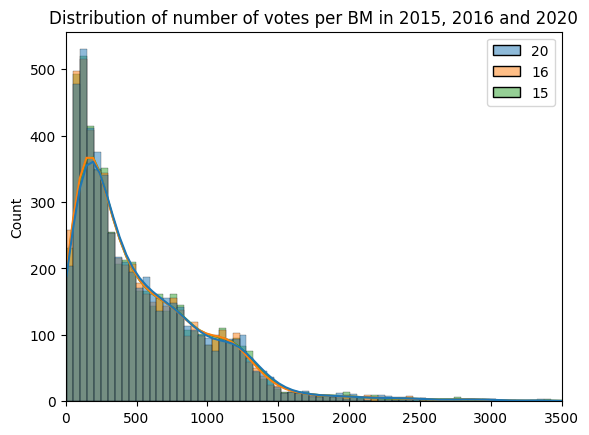

In [139]:
all_data = {"20": df_20_processed["Ukupno birača"].values,"16":df_16_processed["Ukupno birača"].values,"15":df_15_processed["Ukupno birača"].values}
fig, ax = plt.subplots()
sns.histplot(all_data, kde=True, ax=ax)# distplot is deprecate and replaced by histplot
ax.set_xlim(0,3500)
plt.title("Distribution of number of votes per BM in 2015, 2016 and 2020")

In [54]:
#calculate variance of each row across all dataframes
def calculate_variance(dataframes, column_names):
    variance_dict = {}
    big_dict = {}

    #iterate for each stranka
    for stranka in column_names:
        variance_dict[stranka] = {}
        big_dict[stranka] = {}
        
        #iterate over all rows aka biracka mjesta
        for i in tqdm(range(len(dataframes[0]))):
            row_votes = []
            row_percentages = []
            big_dict_votes = []

            #iterate for each year
            for j in range(len(dataframes)):
                #we use the same bm for all dataframes and use 2020 as reference
                bm = dataframes[0]["BM"].iloc[i]
                #some biracka mjesta are missing in some years
                try:
                    #for that year dataframe[j] we find the same bm as the reference
                    entry_of_interest = dataframes[j].loc[dataframes[j]['BM'] == bm]

                    #absolute number of votes for that stranka
                    votes = int(entry_of_interest[stranka].values[0])
                    #calculate percentage of votes for that stranka
                    value = (votes / int(entry_of_interest["Glasovalo ukupno"].values[0]))*100

                    row_votes.append(votes)
                    row_percentages.append(value)
                    big_dict_votes.append(str(votes) + "/" + str(entry_of_interest["Glasovalo ukupno"].values[0]))
                except:
                    pass
            
            #if the bm was present for all years
            if len(row_percentages) == len(dataframes):
            #if we decide to include 2011
            #if len(row_percentages) == len(dataframes) or (stranka=="MOST" and len(row_percentages) == len(dataframes)-1): 
                 
                #find max difference between elements in row
                diff = max(row_votes) - min(row_votes)
                #find max difference in percentages
                diff_percent = max(row_percentages) - min(row_percentages)

                #meadian of percentages
                median = np.mean(row_percentages)

                #if all row_votes 0, we skip
                if row_votes == [0,0,0]:
                    # print(stranka, dataframes[0]["BM"].iloc[i], big_dict_votes)
                    continue

                variance_dict[stranka][dataframes[0]["BM"].iloc[i]] = [diff, diff_percent, np.var(row_percentages), np.std(row_percentages), median]
                big_dict[stranka][dataframes[0]["BM"].iloc[i]] = big_dict_votes


    return big_dict, variance_dict

In [55]:
column_names = ["HDZ", "SDP", "MOST"]
dataframes = [df_20_processed, df_16_processed, df_15_processed]
big_dict, variance_dict = calculate_variance(dataframes, column_names)    

100%|██████████| 5431/5431 [00:17<00:00, 316.92it/s]


In [ ]:
len(variance_dict["HDZ"])

5435

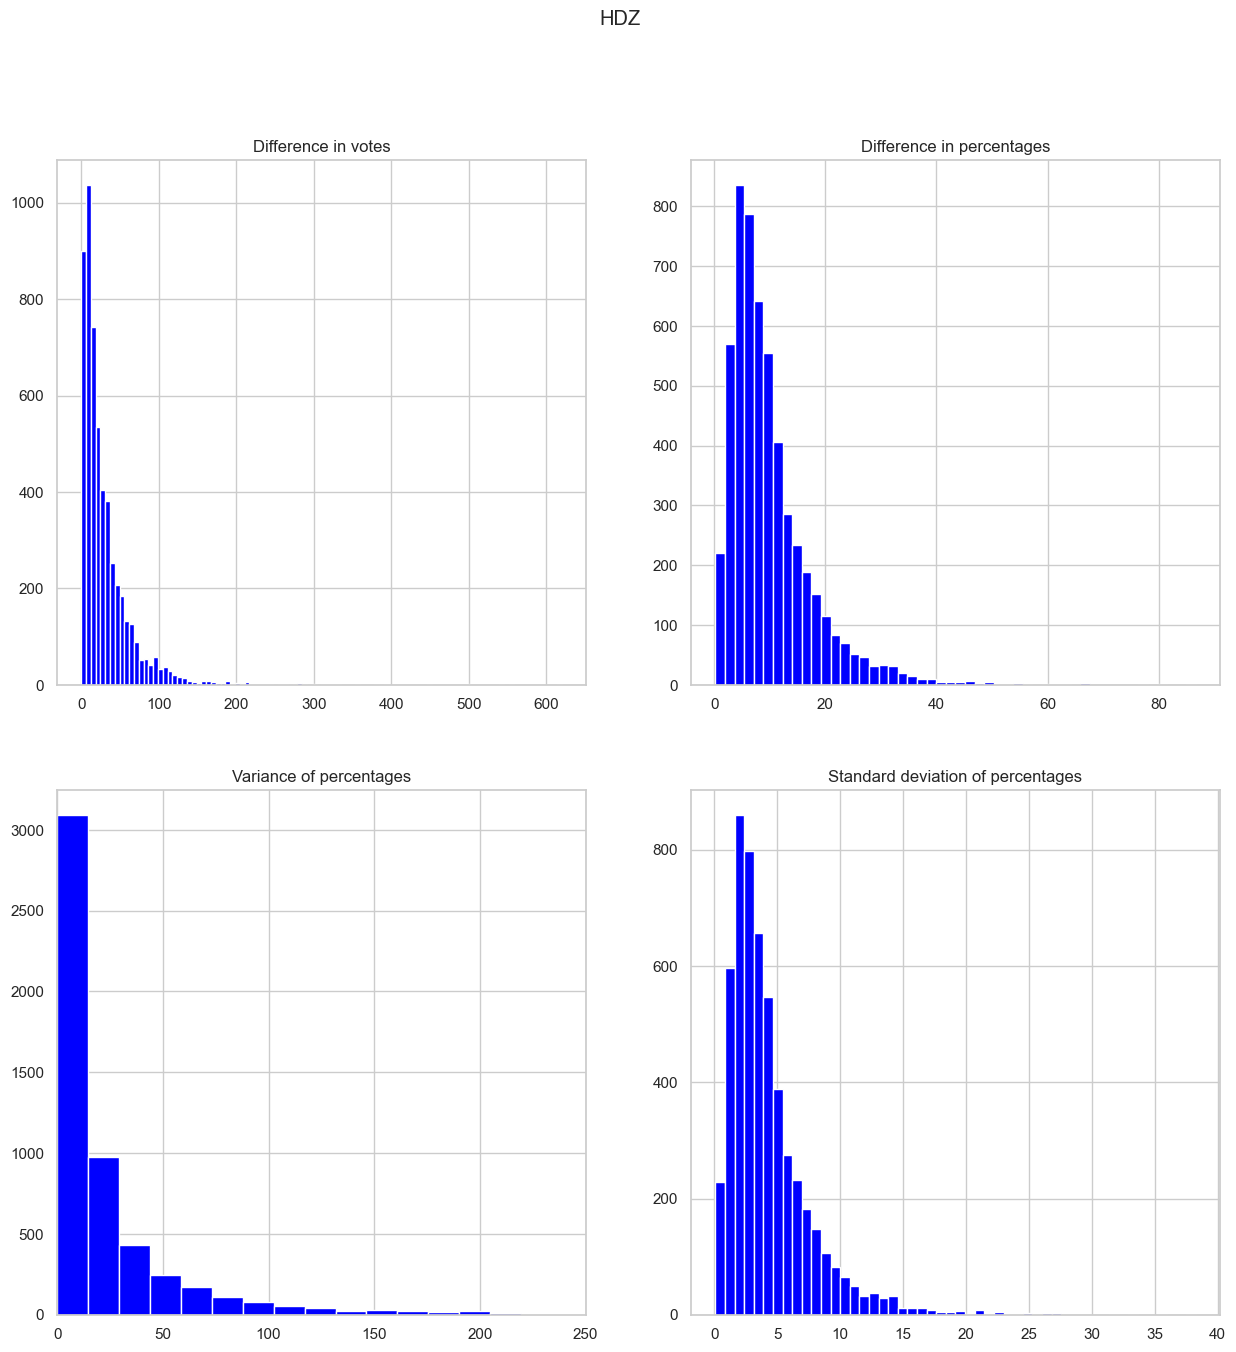

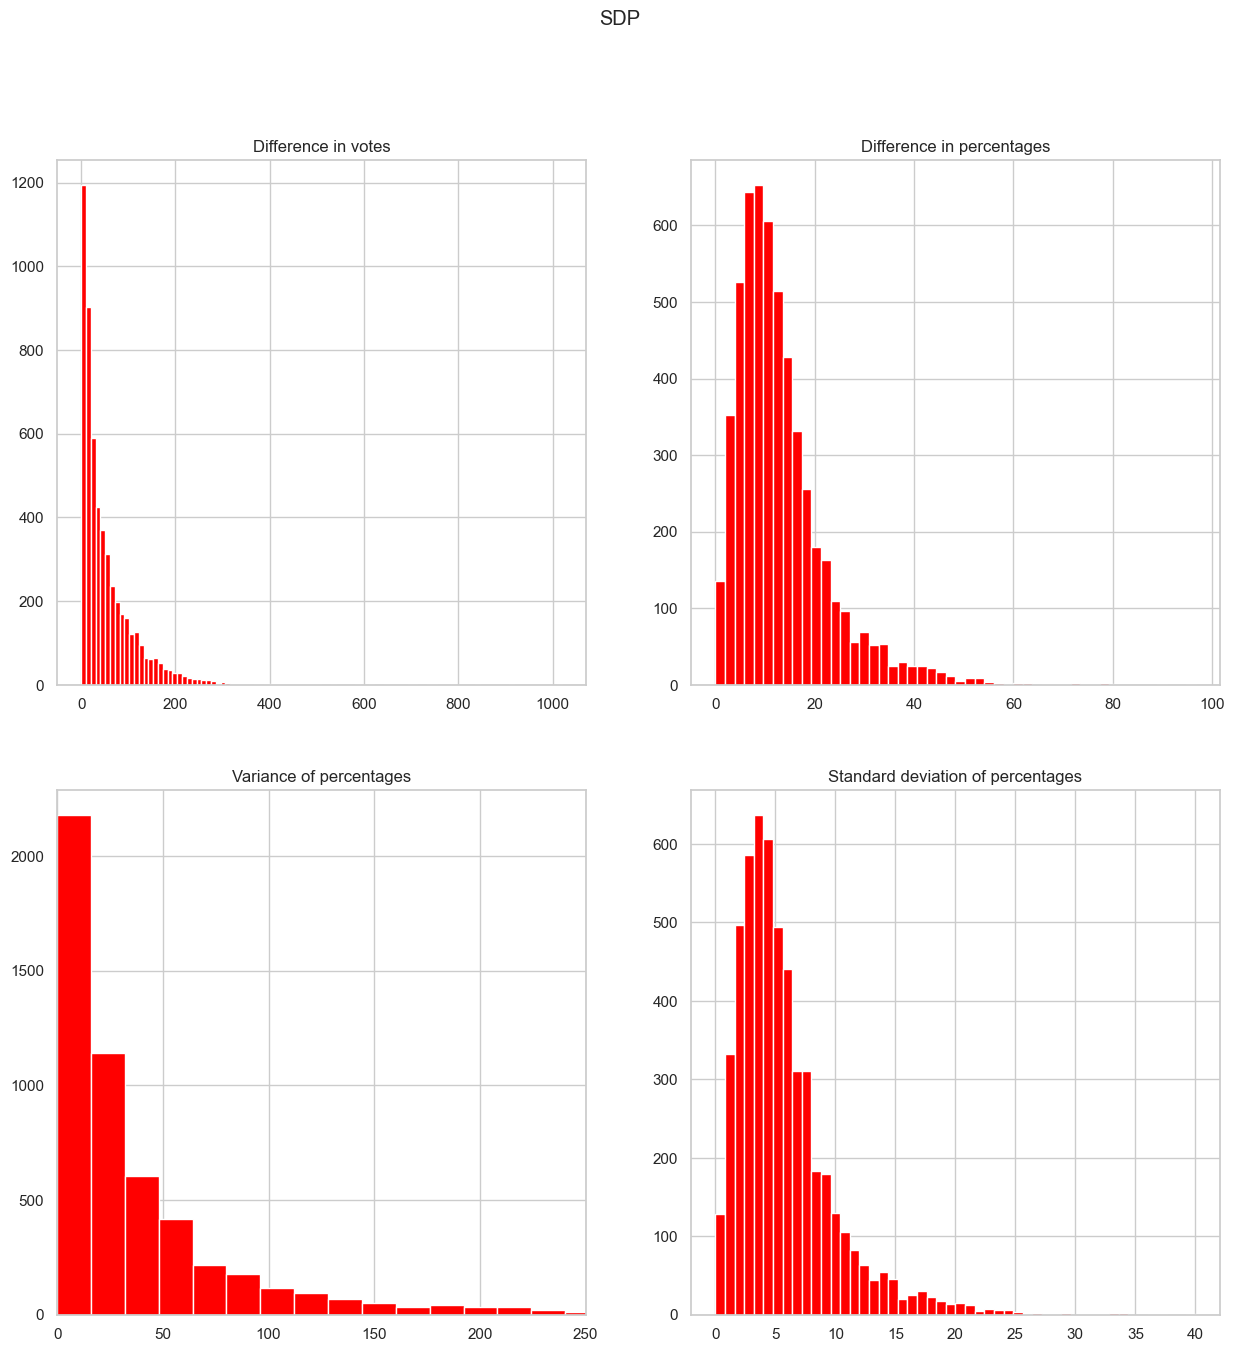

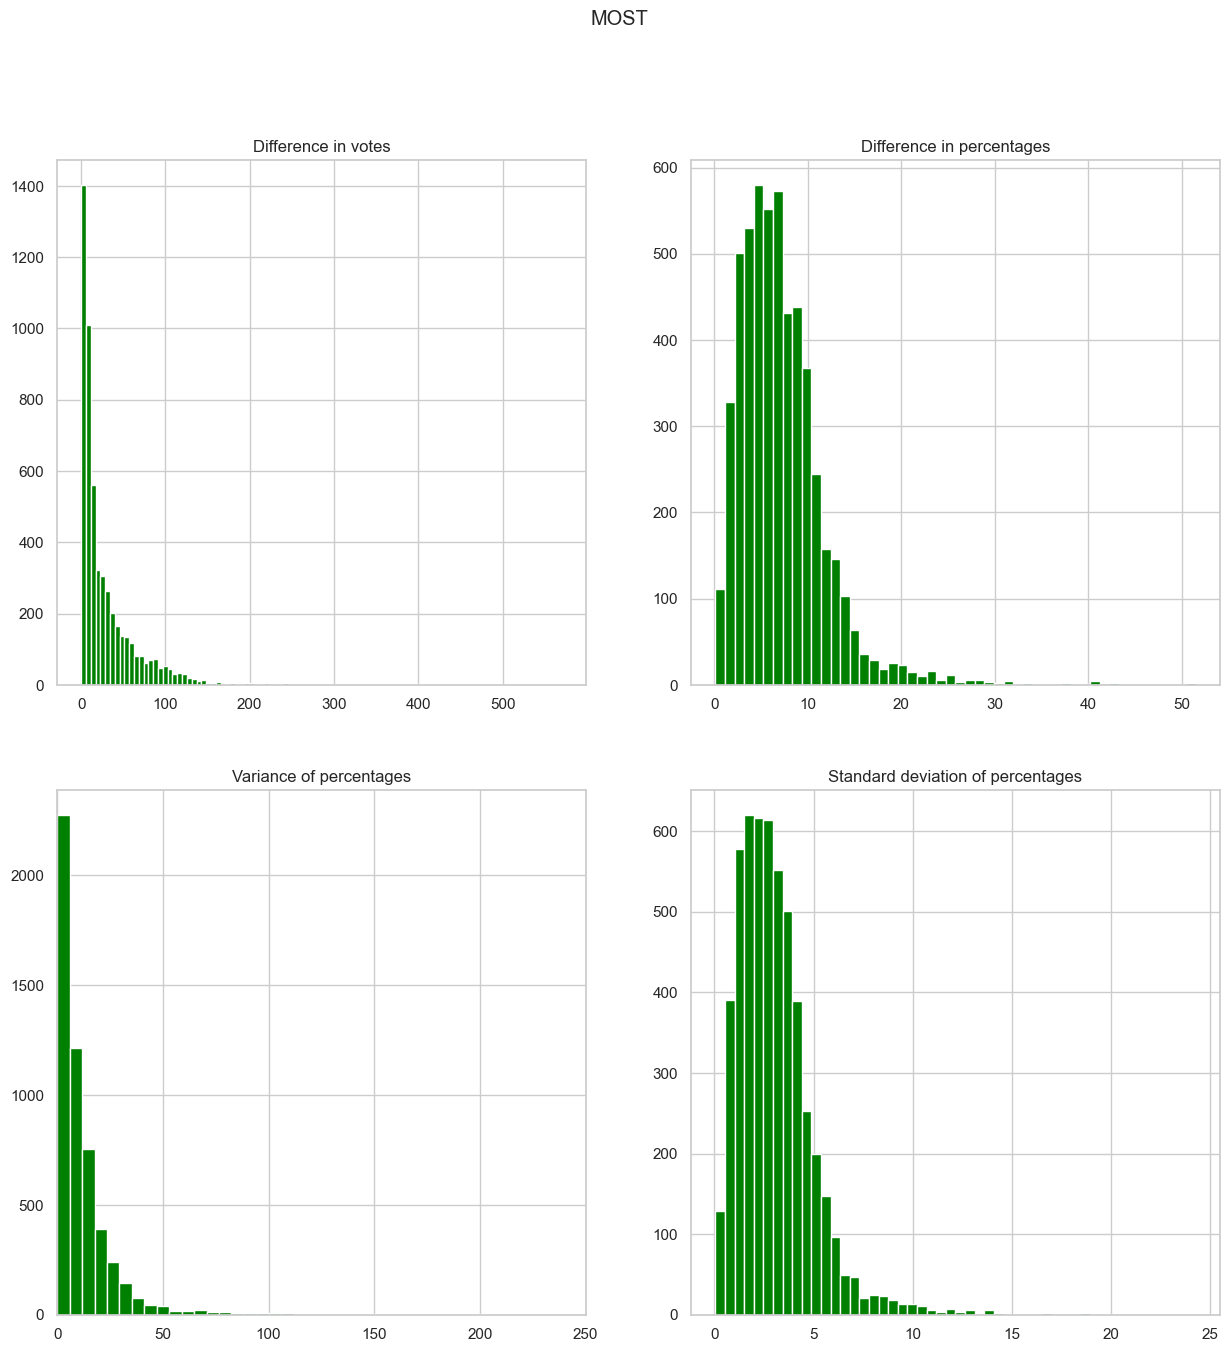

In [ ]:
sns.set(style="whitegrid")

colors= {"HDZ": "blue", "SDP": "red", "MOST": "green"}
def plot_hist(big_dict, variance_dict, stranka):
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(stranka)
    axs[0, 0].hist([x[0] for x in variance_dict[stranka].values()], bins=100, color= colors[stranka])
    axs[0, 0].set_title("Difference in votes")
    axs[0, 1].hist([x[1] for x in variance_dict[stranka].values()], bins=50, color= colors[stranka])
    axs[0, 1].set_title("Difference in percentages")
    axs[1, 0].set_xlim(0, 250)
    axs[1, 0].hist([x[2] for x in variance_dict[stranka].values()], bins=100, color= colors[stranka])
    axs[1, 0].set_title("Variance of percentages")
    axs[1, 1].hist([x[3] for x in variance_dict[stranka].values()], bins=50, color= colors[stranka])
    axs[1, 1].set_title("Standard deviation of percentages")
    plt.show()

for stranka in column_names:
    plot_hist(big_dict, variance_dict, stranka)
    

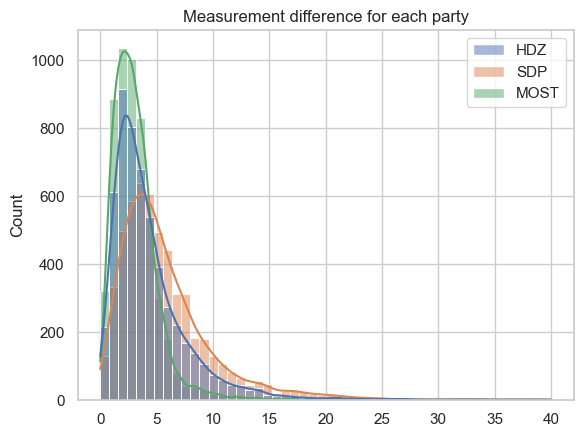

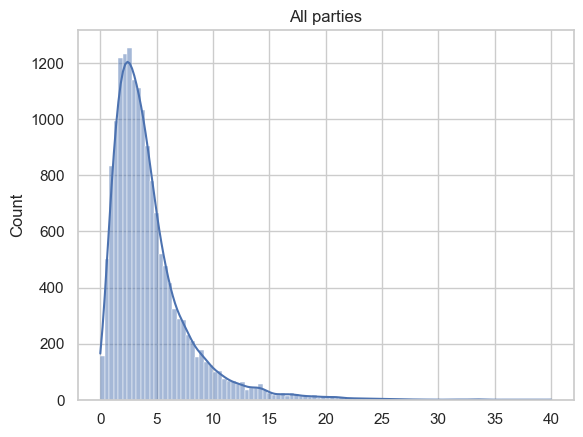

In [ ]:
#visualize the distribution of variance
def plot_variance(variance_dict, column_names):
    new_values = {}
    for stranka in column_names:
        values = list(variance_dict[stranka].values())
        new_values[stranka] = [value[3] for value in values]
        
    sns.histplot(new_values, kde=True, bins=50, color=colors.get(stranka, 'black'), label=stranka)
    plt.title("Measurement difference for each party")
    plt.show()

    sns.histplot([item for sublist in new_values.values() for item in sublist], kde=True, bins=100)
    plt.title("All parties")
    plt.show()

plot_variance(variance_dict, column_names)



-------

### Biračka mjesta koja imaju minimalne promjene kroz godine za:
- value_type = 0: razlika u apsolutnoj vrijednosti u broju glasova
- value_type = 1: razlika u postotku glasova
- value_type = 2: varijanca postotka glasova
- value_type = 3: standardna devijacija postotka glasova

In [ ]:
def get_least_volatile(variance_dict, big_dict, threshold_value = 25.0, value_type=1):

    # Sort items in variance_dict based on the fourth element in the tuple
    items_variance = list(variance_dict.items())
    items_variance.sort(key=lambda x: x[1][value_type])

    print("Least volatile:")
    bms = []
    medians = []
    for value in items_variance:
        # kroz godine promjena manja od 2%
        if value[1][value_type] < 5 :
            print(f"{value[0]}: Measure value = {value[1][value_type]}, Votes over years: {big_dict[value[0]]}, Median: {value[1][4]}")
            bms.append(value[0])
            medians.append(value[1][4])
    
    print("\nBroj BM koji imaju male promjene: "+ str(len(bms)))
    return bms, medians

In [ ]:
print("HDZ")
bms_hdz, medians_hdz =get_least_volatile(variance_dict["HDZ"], big_dict["HDZ"], 0, 1)

HDZ
Least volatile:
7 VINKOVCI, VINKOVCI: Measure value = 0.17595720720720465, Votes over years: ['95/222', '110/256', '135/315'], Median: 42.87289521664522
16 VIROVITICA, VIROVITICA: Measure value = 0.23052009906648863, Votes over years: ['96/290', '106/322', '119/362'], Median: 32.965210370347585
3 GORNJA DUBRAVA, GORNJI MIHALJEVEC: Measure value = 0.24154589371980606, Votes over years: ['9/81', '10/92', '11/101'], Median: 10.957255145804437
4 DOLIĆA DRAGA, LOKVIČIĆI: Measure value = 0.24424105306458443, Votes over years: ['138/176', '147/187', '163/208'], Median: 78.46136706430823
BIRAČKO MJESTO BR 8NOVI VINODOLSKI MERGED HETERO: Measure value = 0.25681014763983967, Votes over years: ['186/396', '197/420', '216/458'], Median: 47.012010308953535
1 CERNA, CERNA: Measure value = 0.26235846451257316, Votes over years: ['191/426', '213/474', '276/612'], Median: 44.95680960920649
NARTAŠTEFANJE MERGED HETERO: Measure value = 0.26933004152171236, Votes over years: ['48/134', '48/133', '58/1

<Axes: ylabel='Count'>

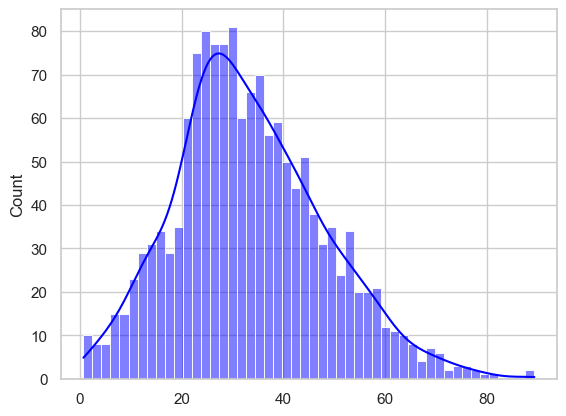

In [ ]:
#draw distribution of medians
sns.histplot(medians_hdz, kde=True, bins=50, color="blue")

In [ ]:
print("SDP")
bms_sdp, medians_sdp =get_least_volatile(variance_dict["SDP"], big_dict["SDP"],0, 1)

SDP
Least volatile:
63 BIRAČKO MJESTO 63, ŠIBENIK: Measure value = 0.0, Votes over years: ['2/10', '4/20', '4/20'], Median: 20.0
17 KUČIĆE, OMIŠ: Measure value = 0.1388888888888884, Votes over years: ['10/288', '12/333', '13/360'], Median: 3.562312312312312
2 DAVOR, DAVOR: Measure value = 0.18918165974512036, Votes over years: ['62/383', '66/403', '74/457'], Median: 16.25257364902379
7 SVIBIĆ, CISTA PROVO: Measure value = 0.2360203340595497, Votes over years: ['1/68', '1/77', '1/81'], Median: 1.3346191450766616
9 PETRINJA, PETRINJA: Measure value = 0.30913738778907884, Votes over years: ['100/308', '122/378', '145/445'], Median: 32.44231146852869
KATUNI PRPUŠAŠESTANOVAC MERGED HETERO: Measure value = 0.332739156268568, Votes over years: ['2/85', '2/92', '2/99'], Median: 2.18235208005029
9 AUGUŠTANOVEC, POKUPSKO: Measure value = 0.432900432900432, Votes over years: ['14/57', '16/66', '19/77'], Median: 24.49305080884028
8 JURDANI, MATULJI: Measure value = 0.4577508350859887, Votes over y

<Axes: ylabel='Count'>

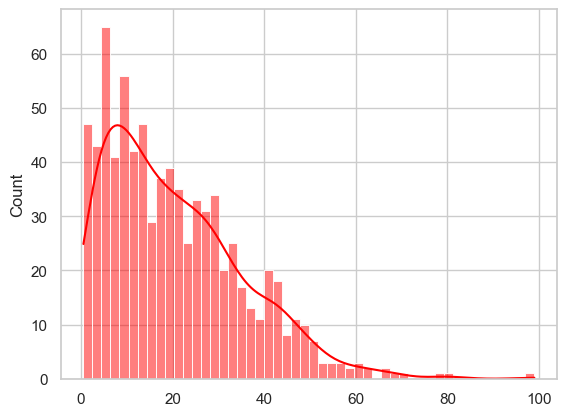

In [ ]:
sns.histplot(medians_sdp, kde=True, bins=50, color="red")

In [ ]:
print("MOST")
bms_most, medians_most =get_least_volatile(variance_dict["MOST"], big_dict["MOST"],25, 1)

MOST
Least volatile:
GARDINOVECBELICA MERGED HETERO: Measure value = 0.1064988213332696, Votes over years: ['10/332', '12/386', '13/433'], Median: 3.0410553172495653
SELNICASELNICA MERGED HETERO: Measure value = 0.13980452613208527, Votes over years: ['21/385', '29/529', '32/599'], Median: 5.42627470140559
15 SIROVA KATALENA, ĐURĐEVAC: Measure value = 0.20468364336885203, Votes over years: ['1/113', '1/135', '1/147'], Median: 0.7686562005988892
5 ĐURĐENOVAC, ĐURĐENOVAC: Measure value = 0.24291977722478997, Votes over years: ['10/262', '11/291', '14/348'], Median: 3.873283709133078
9 RUJEVAC, DVOR: Measure value = 0.27580772261623343, Votes over years: ['1/47', '1/54', '1/53'], Median: 1.955434626383375
11 VATROGASNI DOM, PLETERNICA: Measure value = 0.2777777777777777, Votes over years: ['1/36', '1/40', '1/40'], Median: 2.5925925925925926
35 SLANA, PETRINJA: Measure value = 0.32894736842105265, Votes over years: ['3/112', '3/110', '4/133'], Median: 2.804454317612212
9 BOKŠIĆ, ĐURĐENOVAC

<Axes: ylabel='Count'>

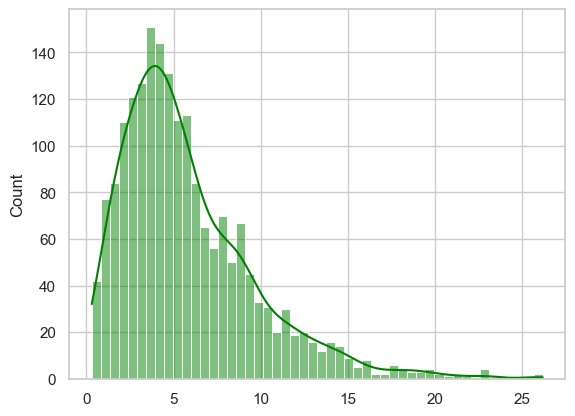

In [ ]:
sns.histplot(medians_most, kde=True, bins=50, color="green")

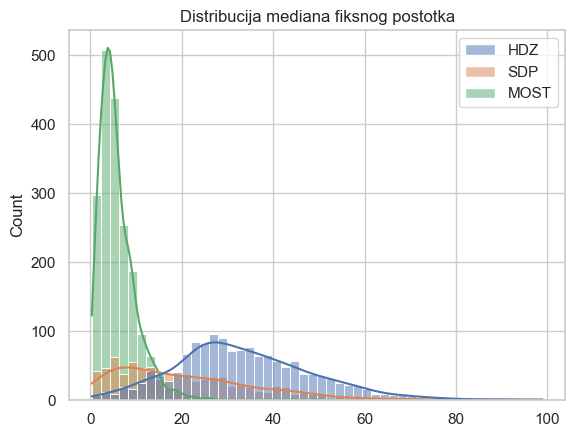

In [ ]:
sns.histplot({"HDZ": medians_hdz, "SDP":medians_sdp, "MOST":medians_most}, kde=True, bins=50, color=["red", "blue", "green"])
plt.title("Distribucija mediana fiksnog postotka")
plt.show()

In [ ]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapiExercises")

cleaned_names = {}
medians = {}
cleaned_names["HDZ"]=[re.sub(r'\s+\d+$', '', name) for name in bms_hdz]
medians["HDZ"] = medians_hdz
cleaned_names["SDP"] = [re.sub(r'\s+\d+$', '', name) for name in bms_sdp]
medians["SDP"] = medians_sdp
cleaned_names["MOST"] = [re.sub(r'\s+\d+$', '', name) for name in bms_most]
medians["MOST"] = medians_most


In [ ]:

# This will hold the place names and their coordinates
places_with_coordinates = []

for stranka in ["HDZ", "SDP"]:
    for place, median in tqdm(zip(cleaned_names[stranka], medians[stranka])):
        try:
            location = geolocator.geocode(place + ", Croatia")
            if location:
                places_with_coordinates.append((place, location.latitude, location.longitude, stranka, median))
            time.sleep(1)  # To avoid hitting rate limits
        except Exception as e:
            print(f"Error occurred for {place}: {e}")

# Now, we can plot these on a map
# map = folium.Map(location=[44.28 , 16.26], zoom_start=7)

# for name, lat, lon, stranka, median in places_with_coordinates:
#     folium.Marker(location=[lat, lon], popup=str(name+": "+ str(median)), icon=folium.Icon(color=colors[stranka])).add_to(map)

# map


49it [01:00,  1.23s/it]


KeyboardInterrupt: 

In [ ]:
import pickle

In [ ]:
# with open("places_with_coordinates", "wb") as fp:   #Pickling
#     pickle.dump(places_with_coordinates, fp)

with open("places_with_coordinates_2", "rb") as fp:   # Unpickling
    places_with_coordinates = pickle.load(fp)

In [ ]:
from ipyleaflet import Map, Marker, Popup, WidgetControl, Icon
from ipywidgets import HTML, IntSlider, jslink
import time
import re
from tqdm import tqdm 
from ipywidgets import Layout

In [ ]:
color_mapping = {
    "HDZ": "http://maps.google.com/mapfiles/ms/icons/blue-dot.png",
    "SDP": "http://maps.google.com/mapfiles/ms/icons/red-dot.png",
    # Add more groups and their URLs as needed
}
# Create the map
m = Map(center=(44.28, 16.26), zoom=7, layout=Layout(width='1050px', height='600px'))

# Create markers and add them to a MarkerCluster
markers = []
for name, lat, lon, stranka, median in places_with_coordinates:
    message = HTML()
    message.value = f"Name: {name}<br>Median: {median}"

                # Set the icon color based on the group
    icon_url = color_mapping.get(stranka, "http://maps.google.com/mapfiles/ms/icons/green-dot.png")  # Default to green if not found
    icon = Icon(icon_url=icon_url, icon_size=[32, 32], icon_anchor=[16, 32])

                # Create marker with the custom icon
    marker = Marker(location=(lat, lon), icon=icon)
    popup =  Popup(location=marker.location, child=message, close_button=False, auto_close=False, close_on_escape_key=False)
    marker.popup = popup
    markers.append((marker, median, popup))
    m.add_layer(marker)

# Slider
slider = IntSlider(description='Median Value', min=min([median for _, median, _ in markers]), max=max([median for _, median, _  in markers]), continuous_update=False)

# Link slider to markers
def update_markers(change):
    new_median = change['new']
    for marker, median, original_popup in markers:
        if median >= new_median:
            marker.visible = True
            if marker.popup is None:
                marker.popup = original_popup
        else:
            marker.visible = False
            # Remove the popup
            marker.popup = None

slider.observe(update_markers, 'value')

# Add slider to the map
widget_control = WidgetControl(widget=slider, position='topright')
m.add_control(widget_control)

m


Map(center=[44.28, 16.26], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [ ]:
from ipywidgets.embed import embed_minimal_html

# Export to HTML
embed_minimal_html('map.html', views=[m, slider])